In [1]:
import urllib.request
import json

In [2]:
url = 'http://localhost:3000/analytics'
req = urllib.request.Request(url)

In [3]:
r = urllib.request.urlopen(req).read()
cont = json.loads(r.decode('utf-8'))

In [4]:
cont['delayed_per_hour']

{'0': 3060,
 '1': 703,
 '10': 2523,
 '11': 2488,
 '12': 2455,
 '13': 2573,
 '14': 2565,
 '15': 2762,
 '16': 3450,
 '17': 5961,
 '18': 8240,
 '19': 5865,
 '2': 324,
 '20': 3708,
 '21': 2846,
 '22': 2831,
 '23': 3519,
 '3': 264,
 '4': 214,
 '5': 1077,
 '6': 2577,
 '7': 4834,
 '8': 3708,
 '9': 2641}

In [5]:
import pandas as pd

analytics = pd.read_json(path_or_buf=url,numpy=True)
analytics

,delayed_per_hour,tot_per_hour
0,3060,32422
1,703,5054
2,324,2322
3,264,2085
4,214,4059
5,1077,48913
6,2577,94803
7,4834,100536
8,3708,95243
9,2641,91253


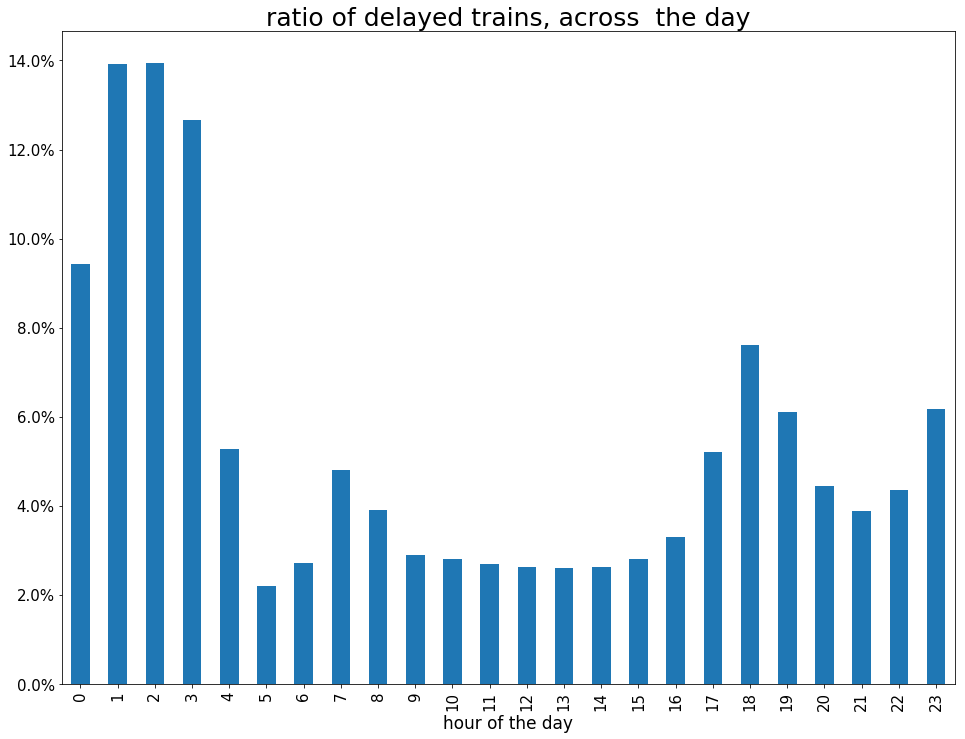

In [6]:
import numpy as np
import pandas as pd
import datetime
from itertools import *
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import cm
from matplotlib import mlab
from mpl_toolkits.basemap import Basemap

import matplotlib.pyplot as plt
%matplotlib inline

def to_percent(y, position):
    s = str(100 * y)
    return s + '%'
    
formatter_percent = FuncFormatter(to_percent)

plot_delay_dist = (analytics.delayed_per_hour/analytics.tot_per_hour).plot(kind='bar', figsize=(16,12))
plot_delay_dist.set_xlabel("hour of the day", fontsize=17)
plot_delay_dist.set_title('ratio of delayed trains, across  the day', fontsize=25)
plot_delay_dist.tick_params(axis='both', which='major', labelsize=15)
plot_delay_dist.yaxis.set_major_formatter(formatter_percent)